'python_ml_intro/mydata/data/' 폴더에 실습에 이용할 데이터들이 있습니다. 그 중 bikeshare 데이터를 이용하여 선형회귀 모델을 학습합니다.

In [1]:
import seaborn as sns
import pandas as pd

data_dir = '../mydata/data/datafile/'
data_name = 'bikeshare.csv'
data_path = f'{data_dir}{data_name}'

open 을 이용하여 파일을 읽어옵니다. 파이썬에서 with open 을 이용하면 with 부분에서 해당 파일을 열고, with 부분이 종료되면 파일을 자동으로 닫습니다. `readlines()` 함수를 이용하면 한 줄을 하나의 str 로 읽습니다. rows 는 list of str 형식입니다.

In [2]:
with open(data_path, encoding='utf-8') as f:
    rows = f.readlines()
print(rows[0])
print(rows[1].strip())
print(rows[2])

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count

2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40



이때 각 str 의 맨 마지막에는 줄바꿈 기호인 `\n` 이 포함되어 있습니다. `str.strip()` 함수는 str 의 앞, 뒤에 빈 칸, tap 기호 `\t` 줄바꿈 기호 `\n` 을 제거합니다.

In [3]:
rows[0]

'datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count\n'

이 파일은 comma separated table 형식의 파일입니다. `pandas.read_csv()` 를 이용하여 DataFrame 의 형태로 파일을 읽습니다. `delimiter` 의 기본값이 ',' 이기 때문에 이는 입력하지 않아도 됩니다. `head()` 함수를 이용하면 테이블의 맨 앞 5개 행을 출력합니다.

In [4]:
# source = pd.read_csv(data_path, delimiter=',')
source = pd.read_csv(data_path)
source.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


DataFrame 에서 column 을 가져올 때에는 dict 에서 key를 입력하여 해당 value 를 가져오듯 [, ] 사이에 column name 을 입력합니다. `DatetimeIndex` 는 str 의 값을 날짜-시간 형식으로 변환합니다. 그리고 연, 월, 시를 새로운 column 으로 추가합니다.

In [5]:
datetime = pd.DatetimeIndex(source['datetime'])
source['year'] = datetime.year
source['month'] = datetime.month
source['hour'] = datetime.hour
source.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


Boolean 으로 된 column 도 만들 수 있습니다. 파이썬에서 and 조건은 `and` 이지만, pandas 에서는 `&` 입니다.

In [6]:
source['daytime'] = (7 <= source.hour) & (source.hour <= 28)
source.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,daytime
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,False


변수 간 관계가 궁금하다면 seaborn 을 이용하여 그 값을 확인할 수 있습니다. 월별 대여 개수의 경향을 간단히 살펴봅니다.

<class 'seaborn.axisgrid.FacetGrid'>


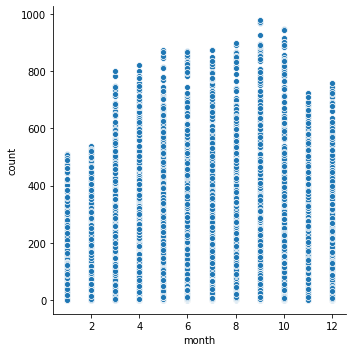

In [7]:
fig = sns.relplot(x='month', y='count', kind='scatter', data=source)
# fig = sns.scatterplot(x='month', y='count', data=source)
# fig = fig.get_figure()
print(type(fig))

fig 의 형식이 FacetGrid 이면 savefig 함수를 이용하여 이 그림을 저장할 수 있습니다.

In [8]:
fig.savefig('month-count-scatterplot.png')

그러나 위 그림은 분포를 알아보기가 어렵습니다. Boxplot 을 이용하여 시즌 별 대여개수의 전반적인 경향과 outliers 를 살펴봅니다. Boxplot 의 가운데 상자는 전체 데이터의 하위 (25 %, 50%, 75%) 를 나타내고, 박스 바깥의 선은 각각 `Q1 - 1.5(Q3 - Q1)`, `Q3 + 1.5(Q3 - Q1)` 을 나타냅니다. 전반적인 분포와 이상치 유무를 살펴볼 수 있습니다. (참고 https://en.wikipedia.org/wiki/Box_plot)

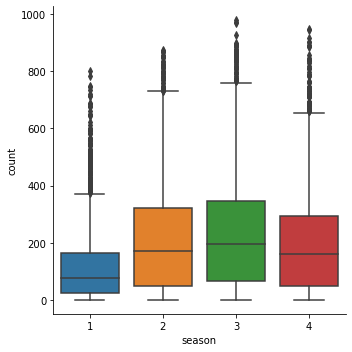

In [9]:
fig = sns.catplot(x='season', y='count', kind='box', data=source)

각 시즌 별 최대값도 확인해 볼 수 있습니다. `unique()` 함수는 column 내 고유값만을 출력해줍니다.

In [10]:
for season in source['season'].unique():
    max_value = source[source['season'] == season]['count'].max()
    print(f'season={season}, max={max_value}')

season=1, max=801
season=2, max=873
season=3, max=977
season=4, max=948


In [ ]:
# source['season'] == season

Categorical variable 을 dummy variables 로 변환하기 위해 `pandas.get_dummies()` 함수를 이용할 수 있습니다. `sample()` 함수는 임의의 순서로 행을 선택하며, `head()` 함수는 테이블의 앞쪽의 행을, `tail()` 의 함수는 테이블의 마지막 행을 선택합니다.

In [11]:
season_dummies = pd.get_dummies(source.season, prefix='season')
season_dummies.sample(n=5, random_state=0)

,season_1,season_2,season_3,season_4
6638,1,0,0,0
7975,0,1,0,0
5915,1,0,0,0
8050,0,1,0,0
5894,1,0,0,0


월별 대여량이 다르므로 월도 dummy variables 로 만듭니다.

In [12]:
month_dummies = pd.get_dummies(source.month, prefix='month')
month_dummies.sample(n=5, random_state=0)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
6638,0,0,1,0,0,0,0,0,0,0,0,0
7975,0,0,0,0,0,1,0,0,0,0,0,0
5915,0,1,0,0,0,0,0,0,0,0,0,0
8050,0,0,0,0,0,1,0,0,0,0,0,0
5894,0,1,0,0,0,0,0,0,0,0,0,0


`pandas.concat()` 함수는 길이가 같은 여러 개의 DataFrame 을 `axis` 를 기준으로 이어붙입니다. pandas 와 numpy 에서 `axis=0` 은 행, `axis=1` 은 열의 방향입니다.

In [13]:
source_train = pd.concat([source, season_dummies, month_dummies], axis=1)
print(source_train.shape)
source_train.head()

(10886, 32)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


pandas 에서는 column 을 접근할 때 DataFrame.column_name 을 이용할 수도 있지만, count 는 DataFrame 의 함수 이름이라 함수가 출력됩니다.

In [14]:
# source_train.corr()
# source_train.corr().season
# source_train.corr().count

이러한 오류를 방지하려면 DataFrame[column_namd] 을 이용하는 것이 좋습니다. 변수 간 상관관계를 계산한 뒤, count 와 상관성이 높은 항목을 살펴봅니다.

In [15]:
source_train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
hour          0.400601
daytime       0.558727
season_1     -0.237704
season_2      0.075681
season_3      0.136942
season_4      0.023704
month_1      -0.166108
month_2      -0.135275
month_3      -0.071981
month_4      -0.012354
month_5       0.046551
month_6       0.084233
month_7       0.073038
month_8       0.071023
month_9       0.070374
month_10      0.060271
month_11      0.003509
month_12     -0.026644
Name: count, dtype: float64

이 중 모델링에 이용할 변수만을 선택하여 각각 input data `X`, output data `y` 로 만듭니다.

In [16]:
variables = (
    ['temp', 'weather', 'humidity', 'daytime'] +
    [f'season_{s}' for s in range(1, 5)] +
    [f'month_{m}' for m in range(1, 13)]
)
X = source_train[variables]
y = source_train['count']

print(type(X))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(10886, 20)
(10886,)


Linear regression 보다 regularization 이 추가된 Ridge regression 이 과적합 방지 능력이 있으므로 이를 이용하여 모델을 학습합니다.

In [17]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.01)
model.fit(X, y)

print(f'intercept : {model.intercept_:.6}')
for i, var in enumerate(variables):
    print(f'{var} : {model.coef_[i]:.6}')

intercept : 10.4415
temp : 8.34171
weather : -17.1903
humidity : -1.47808
daytime : 180.055
season_1 : -15.4033
season_2 : 0.85919
season_3 : -19.1559
season_4 : 33.7001
month_1 : -10.5983
month_2 : -4.27064
month_3 : -0.534415
month_4 : -4.29572
month_5 : 18.3696
month_6 : -13.2147
month_7 : -32.8659
month_8 : -16.385
month_9 : 30.0949
month_10 : 10.1184
month_11 : 8.29433
month_12 : 15.2873


그런데 변수 별로 scale 이 달라서 변수 별 영향력을 판단하기 어렵습니다. 변수의 값을 0 ~ 1 사이로 변환하는 scaler 를 이용합니다.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[0.2244898  0.         0.81       ... 0.         0.         0.        ]
 [0.20408163 0.         0.8        ... 0.         0.         0.        ]
 [0.20408163 0.         0.8        ... 0.         0.         0.        ]
 ...
 [0.32653061 0.         0.61       ... 0.         0.         1.        ]
 [0.32653061 0.         0.61       ... 0.         0.         1.        ]
 [0.30612245 0.         0.66       ... 0.         0.         1.        ]]


다시 새로운 모델을 학습하여봅니다. 대여량에 상대적으로 큰 영향을 미치는 변수들을 찾아봅니다.

In [19]:
model2 = Ridge(alpha=0.01)
model2.fit(X_scaled, y)

print(f'intercept : {model2.intercept_:.6}')
for i, var in enumerate(variables):
    print(f'{var} : {model2.coef_[i]:.6}')

intercept : 0.107478
temp : 335.132
weather : -51.5703
humidity : -147.808
daytime : 180.058
season_1 : -15.4088
season_2 : 0.861065
season_3 : -19.1498
season_4 : 33.6975
month_1 : -10.6026
month_2 : -4.27313
month_3 : -0.533015
month_4 : -4.29896
month_5 : 18.37
month_6 : -13.21
month_7 : -32.8618
month_8 : -16.382
month_9 : 30.0941
month_10 : 10.1216
month_11 : 8.29213
month_12 : 15.2838


## Question

Ridge regression 의 `alpha` 에 의한 성능 저하가 있을까요? 또한 max-min scaling 에 의해 모델의 예측 성능이 좋아졌을까요? `alpha` 및 scaling 에 의한 학습 성능의 차이를 확인하고, 학습데이터 기준 예측 성능이 가장 좋은 모델을 탐색해 봅니다.

In [20]:
# Do something